<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/lab05_Auto_MPG_LHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
pd.read_csv('/content/auto-mpg.data-original.csv') #csv 파일을 불러온다. 그러나 첫번째 데이터가 index로 들어감

,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
400,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
401,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
402,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
403,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [159]:
data=pd.read_csv('/content/auto-mpg.data-original.csv',names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])

In [160]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [161]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
405,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


# 년도 수정

In [163]:
import datetime as dt

In [164]:
data['model year']

0      70
1      70
2      70
3      70
4      70
       ..
401    82
402    82
403    82
404    82
405    82
Name: model year, Length: 406, dtype: int64

In [165]:
pd.to_datetime(data['model year'],format='%y').dt.year

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
401    1982
402    1982
403    1982
404    1982
405    1982
Name: model year, Length: 406, dtype: int64

In [166]:
data['model year']=pd.to_datetime(data['model year'],format='%y').dt.year

In [167]:
data['model year']

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
401    1982
402    1982
403    1982
404    1982
405    1982
Name: model year, Length: 406, dtype: int64

# 원산지 데이터 변환

In [168]:
data['origin'].astype('category') #타입을 int에서 category로 수정

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    2
403    1
404    1
405    1
Name: origin, Length: 406, dtype: category
Categories (3, int64): [1, 2, 3]

In [169]:
data['origin']

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    2
403    1
404    1
405    1
Name: origin, Length: 406, dtype: int64

In [170]:
data['origin']=data['origin'].astype('category')

In [171]:
data['origin']

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    2
403    1
404    1
405    1
Name: origin, Length: 406, dtype: category
Categories (3, int64): [1, 2, 3]

In [172]:
data['origin'].cat.categories=['USA','EU','JAP']

In [173]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,USA,ford torino


#시각화

In [174]:
import seaborn as sns

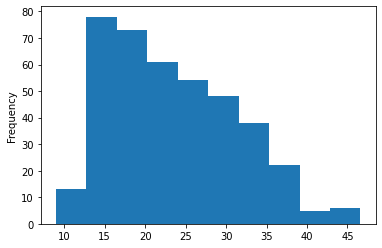

In [175]:
data['mpg'].plot.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


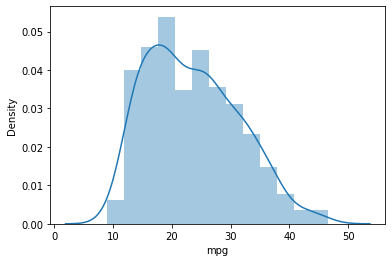

In [176]:
sns.distplot(data['mpg'])

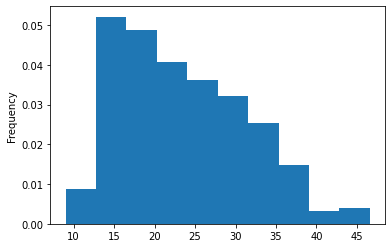

In [177]:
data['mpg'].plot.hist(density=True)

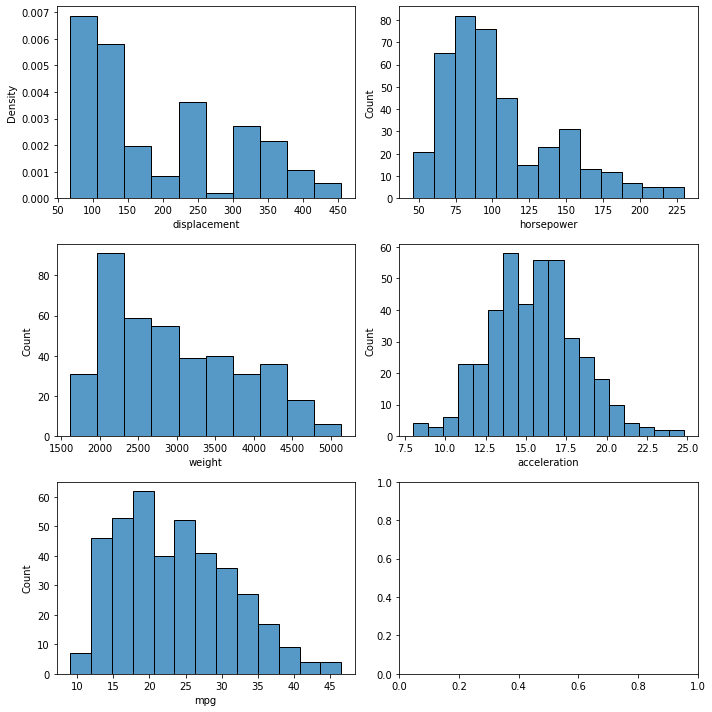

In [178]:
figure,ax=plt.subplots(3,2, figsize=(10,10))
sns.histplot(data['displacement'],ax=ax[0,0],stat="density")
sns.histplot(data['horsepower'],ax=ax[0,1])
sns.histplot(data['weight'],ax=ax[1,0])
sns.histplot(data['acceleration'],ax=ax[1,1])
sns.histplot(data['mpg'],ax=ax[2,0])

plt.tight_layout()
plt.show(sns)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


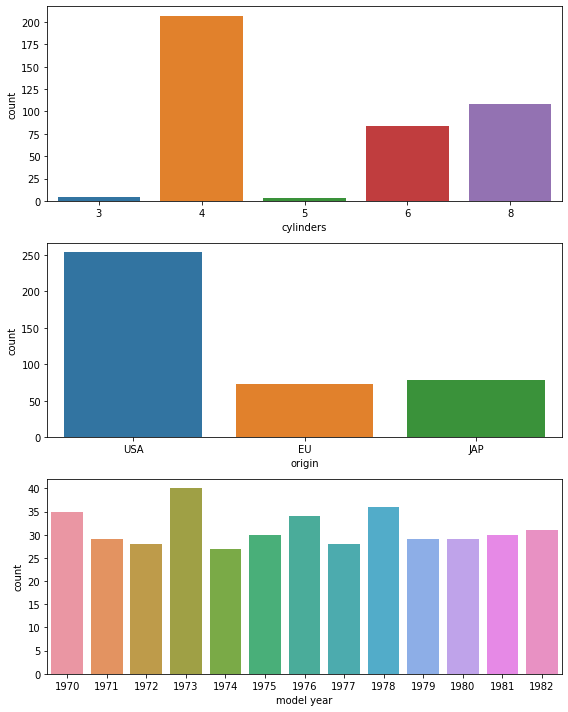

In [179]:
figure, ax=plt.subplots(nrows=3, figsize=(8,10))
sns.countplot(data['cylinders'],ax=ax[0])
sns.countplot(data['origin'],ax=ax[1])
sns.countplot(data['model year'],ax=ax[2])

plt.tight_layout()
plt.show(sns)

#편포도

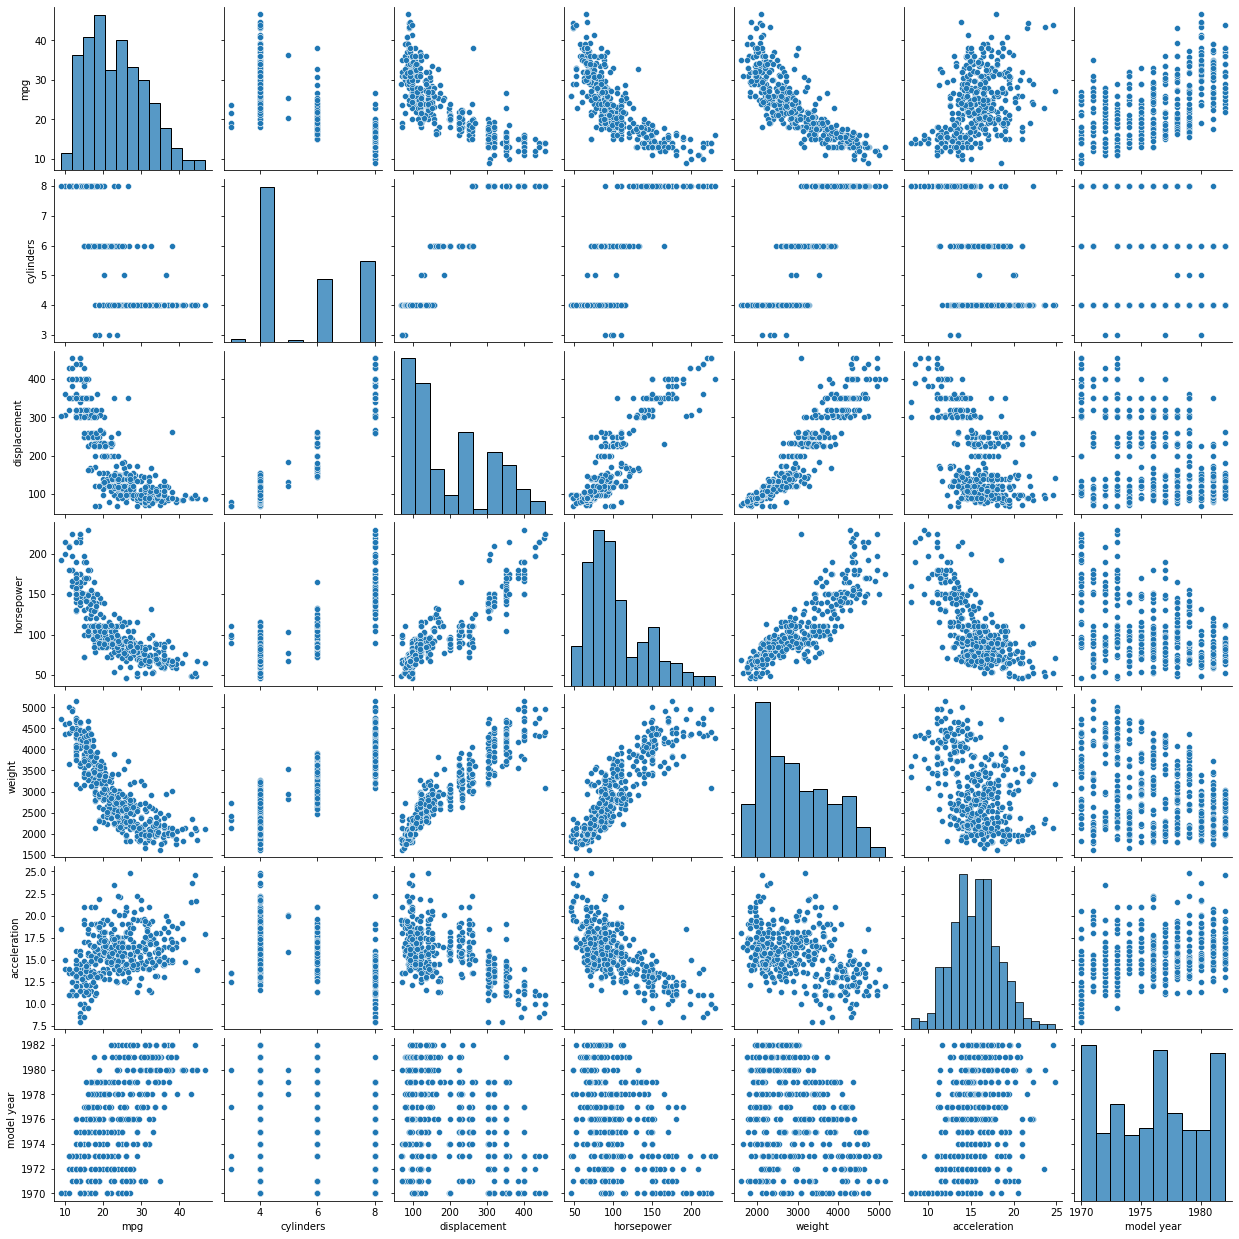

In [180]:
sns.pairplot(data)

In [181]:
data[['mpg','displacement']]      #리스트로 뽑음

,mpg,displacement
0,18.0,307.0
1,15.0,350.0
2,18.0,318.0
3,16.0,304.0
4,17.0,302.0
...,...,...
401,27.0,140.0
402,44.0,97.0
403,32.0,135.0
404,28.0,120.0


In [182]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [183]:
skewness=data[['mpg','displacement','horsepower','weight','acceleration','origin']]
skewness

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504,12.0,USA
1,15.0,350.0,165.0,3693,11.5,USA
2,18.0,318.0,150.0,3436,11.0,USA
3,16.0,304.0,150.0,3433,12.0,USA
4,17.0,302.0,140.0,3449,10.5,USA
...,...,...,...,...,...,...
401,27.0,140.0,86.0,2790,15.6,USA
402,44.0,97.0,52.0,2130,24.6,EU
403,32.0,135.0,84.0,2295,11.6,USA
404,28.0,120.0,79.0,2625,18.6,USA


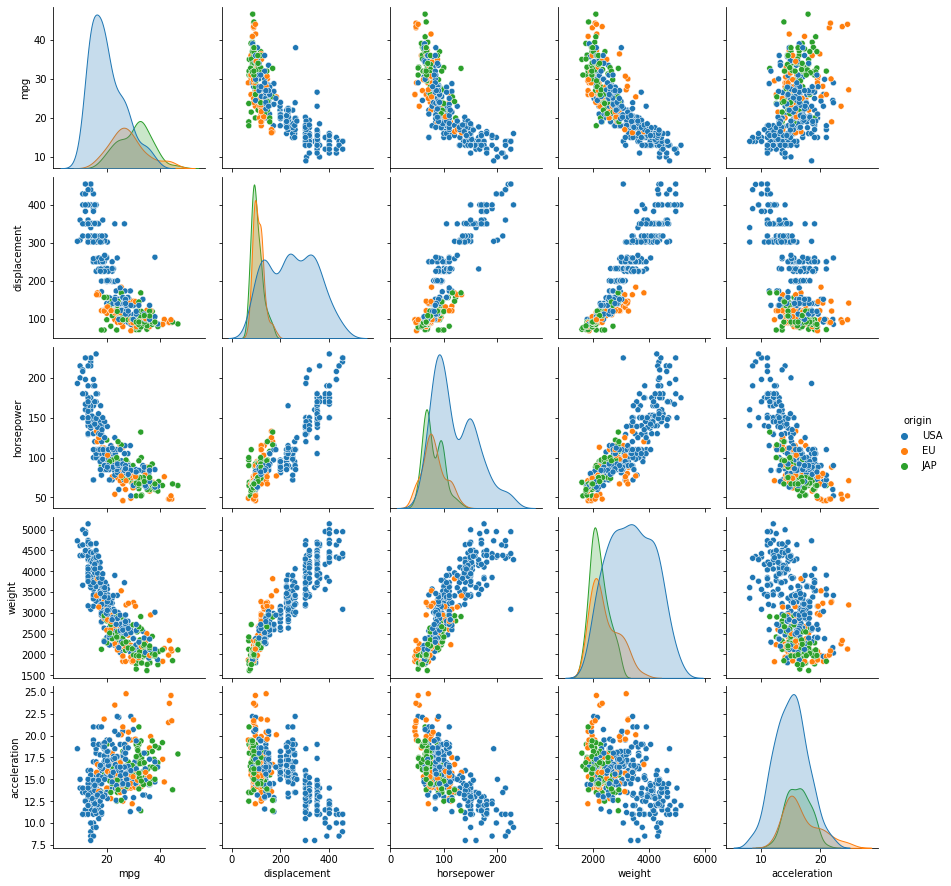

In [184]:
sns.pairplot(skewness,hue='origin')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


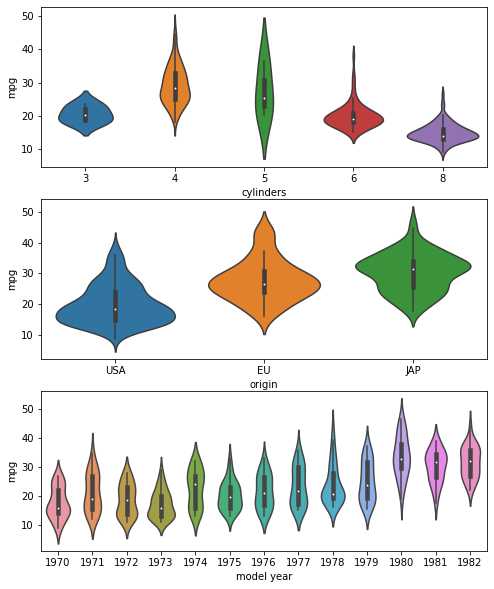

In [185]:
figure,ax=plt.subplots(nrows=3,figsize=(8,10))

sns.violinplot(data['cylinders'],data['mpg'],ax=ax[0])
sns.violinplot(data['origin'],data['mpg'],ax=ax[1])
sns.violinplot(data['model year'],data['mpg'],ax=ax[2])

plt.show(sns)

In [186]:
data.loc[0:1,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,buick skylark 320


In [187]:
data['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
401    27.0
402    44.0
403    32.0
404    28.0
405    31.0
Name: mpg, Length: 406, dtype: float64

In [188]:
data['mpg'].max()

46.6

In [189]:
data.loc[data['mpg']==data['mpg'].max()] #ture인 값만 찾아줌

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
329,46.6,4,86.0,65.0,2110,17.9,1980,JAP,mazda glc


In [190]:
data.loc[data['horsepower']==data['horsepower'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
123,16.0,8,400.0,230.0,4278,9.5,1973,USA,pontiac grand prix


In [191]:
data.loc[data['acceleration']==data['acceleration'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
306,27.2,4,141.0,71.0,3190,24.8,1979,EU,peugeot 504


In [192]:
data.loc[data['weight']==data['weight'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
51,13.0,8,400.0,175.0,5140,12.0,1971,USA,pontiac safari (sw)


In [193]:
data.loc[data['weight']==data['weight'].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
61,35.0,4,72.0,69.0,1613,18.0,1971,JAP,datsun 1200


In [194]:
pd.get_dummies(data['origin'])

,USA,EU,JAP
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
401,1,0,0
402,0,1,0
403,1,0,0
404,1,0,0


In [195]:
origin_onehot=pd.get_dummies(data['origin'])

In [196]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,USA,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,1982,USA,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,1982,EU,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,1982,USA,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,1982,USA,ford ranger


In [197]:
data=pd.concat([data,origin_onehot],axis=1) #병합   

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     406 non-null    int64   
 2   displacement  406 non-null    float64 
 3   horsepower    400 non-null    float64 
 4   weight        406 non-null    int64   
 5   acceleration  406 non-null    float64 
 6   model year    406 non-null    int64   
 7   origin        406 non-null    category
 8   car name      406 non-null    object  
 9   USA           406 non-null    uint8   
 10  EU            406 non-null    uint8   
 11  JAP           406 non-null    uint8   
dtypes: category(1), float64(4), int64(3), object(1), uint8(3)
memory usage: 27.2+ KB


In [199]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,USA,EU,JAP
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,1970,USA,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,1970,USA,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,1970,USA,ford torino,1,0,0


In [200]:
data['missing']='train'
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,USA,EU,JAP,missing
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,chevrolet chevelle malibu,1,0,0,train
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,buick skylark 320,1,0,0,train
2,18.0,8,318.0,150.0,3436,11.0,1970,USA,plymouth satellite,1,0,0,train
3,16.0,8,304.0,150.0,3433,12.0,1970,USA,amc rebel sst,1,0,0,train
4,17.0,8,302.0,140.0,3449,10.5,1970,USA,ford torino,1,0,0,train


In [201]:
data['missing']=data['missing'].where(data['mpg'].notna(),'mpg')
data['missing']=data['missing'].where(data['horsepower'].notna(),'horsepower')

In [202]:
data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,USA,EU,JAP,missing
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,chevrolet chevelle malibu,1,0,0,train
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,buick skylark 320,1,0,0,train
2,18.0,8,318.0,150.0,3436,11.0,1970,USA,plymouth satellite,1,0,0,train
3,16.0,8,304.0,150.0,3433,12.0,1970,USA,amc rebel sst,1,0,0,train
4,17.0,8,302.0,140.0,3449,10.5,1970,USA,ford torino,1,0,0,train
5,15.0,8,429.0,198.0,4341,10.0,1970,USA,ford galaxie 500,1,0,0,train
6,14.0,8,454.0,220.0,4354,9.0,1970,USA,chevrolet impala,1,0,0,train
7,14.0,8,440.0,215.0,4312,8.5,1970,USA,plymouth fury iii,1,0,0,train
8,14.0,8,455.0,225.0,4425,10.0,1970,USA,pontiac catalina,1,0,0,train
9,15.0,8,390.0,190.0,3850,8.5,1970,USA,amc ambassador dpl,1,0,0,train


In [203]:
data[data['missing'].isin(['horsepower'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,USA,EU,JAP,missing
38,25.0,4,98.0,NaN,2046,19.0,1971,USA,ford pinto,1,0,0,horsepower
133,21.0,6,200.0,NaN,2875,17.0,1974,USA,ford maverick,1,0,0,horsepower
337,40.9,4,85.0,NaN,1835,17.3,1980,EU,renault lecar deluxe,0,1,0,horsepower
343,23.6,4,140.0,NaN,2905,14.3,1980,USA,ford mustang cobra,1,0,0,horsepower
361,34.5,4,100.0,NaN,2320,15.8,1981,EU,renault 18i,0,1,0,horsepower
382,23.0,4,151.0,NaN,3035,20.5,1982,USA,amc concord dl,1,0,0,horsepower


In [204]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'USA', 'EU', 'JAP',
       'missing'],
      dtype='object')

In [205]:
train_columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','USA','EU','JAP']

In [206]:
train_data=data[train_columns]

In [207]:
train_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,EU,JAP
0,18.0,8,307.0,130.0,3504,12.0,1970,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,1970,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,1970,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,1970,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,1970,1,0,0
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,1982,1,0,0
402,44.0,4,97.0,52.0,2130,24.6,1982,0,1,0
403,32.0,4,135.0,84.0,2295,11.6,1982,1,0,0
404,28.0,4,120.0,79.0,2625,18.6,1982,1,0,0


In [208]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   USA           406 non-null    uint8  
 8   EU            406 non-null    uint8  
 9   JAP           406 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.5 KB


In [209]:
refined_data=train_data.dropna().reset_index(drop=True) #누락된값을 제거하고 index를 초기화

In [210]:
refined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   USA           392 non-null    uint8  
 8   EU            392 non-null    uint8  
 9   JAP           392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 22.7 KB


In [211]:
refined_data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,EU,JAP
387,27.0,4,140.0,86.0,2790,15.6,1982,1,0,0
388,44.0,4,97.0,52.0,2130,24.6,1982,0,1,0
389,32.0,4,135.0,84.0,2295,11.6,1982,1,0,0
390,28.0,4,120.0,79.0,2625,18.6,1982,1,0,0
391,31.0,4,119.0,82.0,2720,19.4,1982,1,0,0


#데이터를 훈련용과 테스트용으로 분할

In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
pd.read_csv('/content/drive/My Drive/Colab Notebooks/auto-mpg.data-original.csv')

,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
400,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
401,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
402,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
403,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


*sklearn_model_selection.train_test_split()

약 70%는 train으로 사용하고, 30%는 test용으로 사용할 예정

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_data=refined_data.iloc[:,1:]    #입력데이터 (실린더수부터 missing까지)
y_data=refined_data.iloc[:,0]     #출력데이터 (mpg)

In [216]:
X_data

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,EU,JAP
0,8,307.0,130.0,3504,12.0,1970,1,0,0
1,8,350.0,165.0,3693,11.5,1970,1,0,0
2,8,318.0,150.0,3436,11.0,1970,1,0,0
3,8,304.0,150.0,3433,12.0,1970,1,0,0
4,8,302.0,140.0,3449,10.5,1970,1,0,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790,15.6,1982,1,0,0
388,4,97.0,52.0,2130,24.6,1982,0,1,0
389,4,135.0,84.0,2295,11.6,1982,1,0,0
390,4,120.0,79.0,2625,18.6,1982,1,0,0


In [217]:
y_data

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [218]:
y_data.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [219]:
X_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,EU,JAP
0,8,307.0,130.0,3504,12.0,1970,1,0,0
1,8,350.0,165.0,3693,11.5,1970,1,0,0
2,8,318.0,150.0,3436,11.0,1970,1,0,0
3,8,304.0,150.0,3433,12.0,1970,1,0,0
4,8,302.0,140.0,3449,10.5,1970,1,0,0


In [220]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3,random_state=777)

In [221]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,EU,JAP
148,4,108.0,93.0,2391,15.5,1974,0,0,1
359,8,350.0,105.0,3725,19.0,1981,1,0,0
243,4,98.0,66.0,1800,14.4,1978,1,0,0
172,6,171.0,97.0,2984,14.5,1975,1,0,0
52,4,71.0,65.0,1773,19.0,1971,0,0,1
...,...,...,...,...,...,...,...,...,...
71,8,304.0,150.0,3892,12.5,1972,1,0,0
87,8,302.0,137.0,4042,14.5,1973,1,0,0
59,4,140.0,90.0,2408,19.5,1972,1,0,0
303,4,151.0,90.0,2670,16.0,1979,1,0,0


In [222]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,EU,JAP
247,8,260.0,110.0,3365,15.5,1978,1,0,0
136,8,318.0,150.0,4457,13.5,1974,1,0,0
290,8,360.0,150.0,3940,13.0,1979,1,0,0
352,4,119.0,100.0,2615,14.8,1981,0,0,1
25,8,360.0,215.0,4615,14.0,1970,1,0,0
...,...,...,...,...,...,...,...,...,...
191,6,200.0,81.0,3012,17.6,1976,1,0,0
41,8,383.0,180.0,4955,11.5,1971,1,0,0
358,6,231.0,110.0,3415,15.8,1981,1,0,0
39,8,351.0,153.0,4154,13.5,1971,1,0,0


In [223]:
X_train.shape

(274, 9)

In [224]:
X_test.shape

(118, 9)

In [225]:
y_train

148    26.0
359    26.6
243    36.1
172    18.0
52     31.0
       ... 
71     15.0
87     14.0
59     20.0
303    28.4
103    12.0
Name: mpg, Length: 274, dtype: float64

In [226]:
y_test

247    19.9
136    14.0
290    18.5
352    32.9
25     10.0
       ... 
191    24.0
41     12.0
358    22.4
39     14.0
215    30.0
Name: mpg, Length: 118, dtype: float64

In [227]:
y_train.shape

(274,)

In [228]:
y_test.shape

(118,)

#예측모델 구현

##예측모델 1 : 선형회귀

In [229]:
results=pd.DataFrame(columns=['train score','test score'])
results

,train score,test score


In [230]:
from sklearn.linear_model import LinearRegression #선형회귀 함수를 불러옴

In [231]:
LR=LinearRegression()
model1=LR.fit(X_train,y_train) #계산 

In [232]:
model1.coef_   #c출력 : uy=a1xa+a2x2+a3x3+...+anxn 임 . 각 a값들이 출력됨

array([-0.23085053,  0.02048873, -0.02031998, -0.0064287 ,  0.17290624,
        0.7478859 , -2.23234975,  1.12401435,  1.1083354 ])

In [233]:
model1.intercept_

-1437.342058790109

In [234]:
model1.score(X_train,y_train)  #엑셀의 추세선에서 R^2값과 같은 의미임

0.8298390341650366

In [235]:
model1.score(X_test,y_test)

0.7976545054499657

In [236]:
data.loc[data['missing'].isin(['mpg'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,USA,EU,JAP,missing
10,NaN,4,133.0,115.0,3090,17.5,1970,EU,citroen ds-21 pallas,0,1,0,mpg
11,NaN,8,350.0,165.0,4142,11.5,1970,USA,chevrolet chevelle concours (sw),1,0,0,mpg
12,NaN,8,351.0,153.0,4034,11.0,1970,USA,ford torino (sw),1,0,0,mpg
13,NaN,8,383.0,175.0,4166,10.5,1970,USA,plymouth satellite (sw),1,0,0,mpg
14,NaN,8,360.0,175.0,3850,11.0,1970,USA,amc rebel sst (sw),1,0,0,mpg
17,NaN,8,302.0,140.0,3353,8.0,1970,USA,ford mustang boss 302,1,0,0,mpg
39,NaN,4,97.0,48.0,1978,20.0,1971,EU,volkswagen super beetle 117,0,1,0,mpg
367,NaN,4,121.0,110.0,2800,15.4,1981,EU,saab 900s,0,1,0,mpg


In [237]:
missing_data=data.loc[data['missing'].isin(['mpg']),train_columns]
missing_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,EU,JAP
10,NaN,4,133.0,115.0,3090,17.5,1970,0,1,0
11,NaN,8,350.0,165.0,4142,11.5,1970,1,0,0
12,NaN,8,351.0,153.0,4034,11.0,1970,1,0,0
13,NaN,8,383.0,175.0,4166,10.5,1970,1,0,0
14,NaN,8,360.0,175.0,3850,11.0,1970,1,0,0
17,NaN,8,302.0,140.0,3353,8.0,1970,1,0,0
39,NaN,4,97.0,48.0,1978,20.0,1971,0,1,0
367,NaN,4,121.0,110.0,2800,15.4,1981,0,1,0


예측모델에 missing데이터를 적용해서 숨겨진 mpg값을 예측

In [238]:
model1.predict(missing_data.iloc[:,1:]) 

array([19.74316103, 11.09302426, 11.96519882, 11.23875753, 12.8854378 ,
       15.08463408, 28.69586699, 29.32685977])

##예측모델 2 : 다항회귀

In [241]:
from sklearn.preprocessing import PolynomialFeatures

In [251]:
PF=PolynomialFeatures()
LR=LinearRegression()

In [247]:
PF.fit_transform([[1],[2],[3]])

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [252]:
model2=LR.fit(PF.fit_transform(X_train),y_train)

In [253]:
model2.coef_

array([-2.65497821e+07,  1.72265913e+02, -5.08425785e+00,  2.51422472e+00,
        5.37247345e-02, -4.41393374e+01, -2.05367134e+02,  2.78891880e+02,
       -2.06533351e+02, -7.23585289e+01, -5.16036519e-01, -1.75530712e-02,
       -4.50880311e-02,  6.50349264e-03,  2.65780205e-01, -1.21327169e-01,
        5.70707130e+01,  5.59007115e+01,  5.92944882e+01,  3.88796667e-05,
        4.35132199e-04, -2.11055329e-05, -1.85493735e-03,  3.44534618e-03,
       -1.57460374e+00, -1.72628687e+00, -1.78336727e+00, -1.37249349e-03,
        8.93807242e-05, -3.51186011e-02, -1.33095989e-03,  8.14438662e-01,
        7.50732634e-01,  9.49053389e-01, -2.51434712e-06,  1.16153400e-03,
       -5.92746825e-05,  1.10826274e-02,  2.27082843e-02,  1.99334729e-02,
       -5.72198251e-02,  3.02974616e-02, -1.54858131e+01, -1.44119066e+01,
       -1.42416177e+01,  6.94733913e-02, -6.87286238e+01, -6.82463003e+01,
       -6.83922103e+01,  2.78891880e+02,  0.00000000e+00,  0.00000000e+00,
       -2.06533351e+02,  

In [254]:
model2.intercept_

26819666.85946403

In [255]:
model2.coef_.shape

(55,)

In [257]:
model2.score(PF.fit_transform(X_train),y_train)

0.8765629596799134

In [258]:
model2.score(PF.fit_transform(X_test),y_test)

0.7996799955395887

##예측모델 3 : 서포트벡터 머신

In [259]:
from sklearn.svm import SVR

In [263]:
svr=SVR(degree=2,C=1e6,epsilon=1e-3)

In [264]:
model3=svr.fit(X_train,y_train)

In [265]:
model3.score(X_train,y_train)

0.8619823389440874

##예측모델 4 : 의사결정 트리

In [268]:
from sklearn.tree import DecisionTreeRegressor

In [292]:
DT=DecisionTreeRegressor(min_samples_leaf=10,max_depth=3,random_state=0)

In [293]:
model4=DT.fit(X_train,y_train)

In [294]:
model4.score(X_train,y_train)

0.8294285269161875

In [295]:
model4.score(X_test,y_test)

0.7638755943137906

##예측모델 5 : 랜덤 포레스트 (끝판왕)

In [296]:
from sklearn.ensemble import RandomForestRegressor

In [299]:
model5=RandomForestRegressor()

In [300]:
model5.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [301]:
model5.score(X_train,y_train)

0.9815011442756284

In [302]:
model5.score(X_test,y_test)

0.8739638675903065